## Aggregate the network with an optimization method

In [177]:
import sys
sys.path.append('../src')
import utils_mistral as utils_old
import models as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
import xarray as xr
import importlib

importlib.reload(m)
importlib.reload(utils_old)

<module 'utils_mistral' from 'c:\\Users\\g630d\\Documents\\00_Cours\\2024-2025_MIT\\00 Thesis\\Dev\\notebooks\\../src\\utils_mistral.py'>

In [178]:
config = utils_old.Config(demand = "total_demand")

In [173]:
data = utils_old.DataProcessor.import_and_interpolate_data(config)

Number of duplicates deleted in nodes_df: 2238


In [179]:
data2 = utils_old.DataProcessor.import_and_interpolate_data(config)

Number of duplicates deleted in nodes_df: 2238


In [198]:
data[2]

,0,1,2,3,4,5,6,7,8,9,...,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604
0,0.494479,0.494479,0.494479,0.494479,0.494479,0.494479,0.494479,0.494479,0.494479,0.494479,...,0.494480,0.494480,0.494481,0.494482,0.494482,0.494482,0.494482,0.494481,0.494481,0.494481
1,0.358932,0.358932,0.358932,0.358932,0.358932,0.358932,0.358932,0.358932,0.358932,0.358932,...,0.358934,0.358934,0.358937,0.358938,0.358939,0.358938,0.358938,0.358937,0.358937,0.358937
2,0.354400,0.354399,0.354399,0.354399,0.354400,0.354399,0.354399,0.354400,0.354399,0.354400,...,0.354404,0.354405,0.354412,0.354413,0.354416,0.354414,0.354415,0.354412,0.354411,0.354410
3,0.189995,0.189994,0.189994,0.189994,0.189995,0.189994,0.189994,0.189994,0.189994,0.189994,...,0.189997,0.189998,0.190002,0.190003,0.190005,0.190003,0.190004,0.190002,0.190001,0.190001
4,0.059726,0.059726,0.059726,0.059726,0.059726,0.059726,0.059726,0.059726,0.059726,0.059726,...,0.059727,0.059727,0.059728,0.059728,0.059729,0.059728,0.059729,0.059728,0.059728,0.059728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.016491,0.016491,0.016491,0.016491,0.016491,0.016491,0.016491,0.016491,0.016491,0.016491,...,0.016491,0.016491,0.016490,0.016490,0.016490,0.016490,0.016490,0.016490,0.016490,0.016490
8756,0.017941,0.017941,0.017941,0.017941,0.017941,0.017941,0.017941,0.017941,0.017941,0.017941,...,0.017941,0.017940,0.017940,0.017940,0.017940,0.017940,0.017940,0.017940,0.017940,0.017940
8757,0.038082,0.038083,0.038083,0.038083,0.038082,0.038083,0.038083,0.038083,0.038083,0.038082,...,0.038082,0.038082,0.038081,0.038081,0.038081,0.038081,0.038081,0.038081,0.038081,0.038081
8758,0.033390,0.033390,0.033390,0.033390,0.033390,0.033390,0.033390,0.033390,0.033390,0.033390,...,0.033389,0.033389,0.033389,0.033389,0.033388,0.033388,0.033388,0.033389,0.033389,0.033389


In [202]:
if data[3].equals(data2[3]):
    print("True")

True


In [200]:
for i in range( 2605 ):
    if not np.array_equal(data[2][i], data2[2][i]):
        print(f"Row {i} is different:")
        print("data:", data[2][i])
        print("data2:", data2[2][i])
    
   

Row 0 is equal
Row 1 is equal
Row 2 is equal
Row 3 is equal
Row 4 is equal
Row 5 is equal
Row 6 is equal
Row 7 is equal
Row 8 is equal
Row 9 is equal
Row 10 is equal
Row 11 is equal
Row 12 is equal
Row 13 is equal
Row 14 is equal
Row 15 is equal
Row 16 is equal
Row 17 is equal
Row 18 is equal
Row 19 is equal
Row 20 is equal
Row 21 is equal
Row 22 is equal
Row 23 is equal
Row 24 is equal
Row 25 is equal
Row 26 is equal
Row 27 is equal
Row 28 is equal
Row 29 is equal
Row 30 is equal
Row 31 is equal
Row 32 is equal
Row 33 is equal
Row 34 is equal
Row 35 is equal
Row 36 is equal
Row 37 is equal
Row 38 is equal
Row 39 is equal
Row 40 is equal
Row 41 is equal
Row 42 is equal
Row 43 is equal
Row 44 is equal
Row 45 is equal
Row 46 is equal
Row 47 is equal
Row 48 is equal
Row 49 is equal
Row 50 is equal
Row 51 is equal
Row 52 is equal
Row 53 is equal
Row 54 is equal
Row 55 is equal
Row 56 is equal
Row 57 is equal
Row 58 is equal
Row 59 is equal
Row 60 is equal
Row 61 is equal
Row 62 is equal
Ro

4

In [ ]:
# Load CSV data

nodes_df, demand_df, wind_df, solar_df = utils_old.import_and_interpolate_data(k=3)
demand_df = demand_df.iloc[:, 1:]
# nodes_df, wind_df, solar_df = utils.import_data_county()
TimeSeries = {'wind': wind_df, 'solar': solar_df};

AttributeError: module 'utils_mistral' has no attribute 'import_and_interpolate_data'

In [96]:
year = 2013
demand_df = pd.read_csv(f"../DATA/dev/demand_hist/county_demand_local_hourly_{year}.csv")
demand = demand_df.iloc[:, 1:].sum(axis=1).values

In [99]:
demand

array([15.18785888, 14.29718709, 13.83891417, ..., 20.78731704,
       20.2806488 , 19.31723847])

In [5]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth's surface.
    """
    R = 6371.0  # Earth radius in kilometers

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * \
        np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

In [112]:
year = 2012
demand_df = pd.read_csv(f"../DATA/dev/demand_hist/county_demand_local_hourly_{year}.csv")
demand = demand_df.iloc[:, 1:].sum(axis=1).values
date_range = pd.date_range(start=f'{year}-01-01', periods=len(demand), freq='h')
demand_series = pd.Series(demand, index=date_range)
    

,Time,23029,9003,9013,9015,25019,50027,33019,33001,33005,...,23009,25001,23011,9007,9001,33007,50005,50009,25005,33009
0,2012-01-01 00:00:00,0.037714,0.829666,0.161421,0.108643,0.007197,0.090879,0.050673,0.075034,0.075000,...,0.111464,0.183324,0.108698,0.171434,0.875478,0.033634,0.032650,0.016394,0.655467,0.110901
1,2012-01-01 01:00:00,0.035777,0.787067,0.153133,0.103064,0.006827,0.086213,0.048071,0.071181,0.071149,...,0.105741,0.173911,0.103116,0.162631,0.830526,0.031907,0.030973,0.015552,0.621811,0.105207
2,2012-01-01 02:00:00,0.034451,0.757878,0.147454,0.099242,0.006574,0.083015,0.046288,0.068541,0.068511,...,0.101820,0.167461,0.099292,0.156600,0.799726,0.030724,0.029825,0.014975,0.598751,0.101305
3,2012-01-01 03:00:00,0.033864,0.744980,0.144944,0.097553,0.006462,0.081603,0.045500,0.067375,0.067345,...,0.100087,0.164611,0.097603,0.153935,0.786116,0.030201,0.029317,0.014720,0.588561,0.099581
4,2012-01-01 04:00:00,0.033420,0.735196,0.143041,0.096272,0.006377,0.080531,0.044903,0.066490,0.066460,...,0.098772,0.162449,0.096321,0.151913,0.775791,0.029805,0.028932,0.014527,0.580832,0.098273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2012-12-31 19:00:00,0.041520,0.913406,0.177713,0.119608,0.007923,0.100052,0.055787,0.082607,0.082570,...,0.122715,0.201827,0.119669,0.188737,0.963842,0.037029,0.035945,0.018048,0.721624,0.122095
8756,2012-12-31 20:00:00,0.041739,0.918220,0.178650,0.120238,0.007965,0.100579,0.056081,0.083042,0.083005,...,0.123361,0.202890,0.120299,0.189731,0.968921,0.037224,0.036135,0.018144,0.725427,0.122738
8757,2012-12-31 21:00:00,0.040862,0.898917,0.174894,0.117711,0.007797,0.098464,0.054902,0.081296,0.081260,...,0.120768,0.198625,0.117770,0.185743,0.948552,0.036442,0.035375,0.017762,0.710177,0.120158
8758,2012-12-31 22:00:00,0.039480,0.868516,0.168979,0.113730,0.007534,0.095134,0.053046,0.078547,0.078512,...,0.116684,0.191908,0.113787,0.179461,0.916473,0.035209,0.034179,0.017161,0.686160,0.116094


In [104]:
date_range

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', length=17520, freq='h')

In [42]:
points = np.column_stack((wind_lat, wind_lon))[:3]
new_points = np.column_stack((nodes_df['Lat'], nodes_df['Lon']))[5:10]
values = wind_CF[:,:3]
k = 2

interpolated_values = []

for new_point in new_points:
    distances = [haversine(new_point[0], new_point[1], point[0], point[1]) for point in points]
    sorted_indices = np.argsort(distances)
    
    nearest_indices = sorted_indices[:k]
    nearest_distances = np.array(distances)[nearest_indices]
    nearest_values = np.array(values)[:,nearest_indices]
    print(nearest_values.shape)
    weights = 1 / nearest_distances
    weights /= weights.sum()
    interpolated_value = np.dot(nearest_values, weights)
    interpolated_values.append(interpolated_value)
    print("Distance: ", distances, "Nearest", nearest_distances, nearest_indices, "Weights", weights, "Interpolated", interpolated_value)

(8760, 2)
Distance:  [9879.452013734513, 9871.634781324265, 9849.493357313513] Nearest [9849.49335731 9871.63478132] [2 1] Weights [0.50056136 0.49943864] Interpolated [0.92014566 0.97736514 0.99124872 ... 0.28928297 0.32499349 0.72720883]
(8760, 2)
Distance:  [9879.452013734513, 9871.634781324265, 9849.493357313513] Nearest [9849.49335731 9871.63478132] [2 1] Weights [0.50056136 0.49943864] Interpolated [0.92014566 0.97736514 0.99124872 ... 0.28928297 0.32499349 0.72720883]
(8760, 2)
Distance:  [9867.361741469645, 9859.532421207763, 9837.398526099703] Nearest [9837.3985261  9859.53242121] [2 1] Weights [0.50056186 0.49943814] Interpolated [0.92014558 0.97736512 0.99124871 ... 0.28928303 0.32499356 0.72720856]
(8760, 2)
Distance:  [9872.358647288287, 9864.531697548311, 9842.396326958979] Nearest [9842.39632696 9864.53169755] [2 1] Weights [0.50056161 0.49943839] Interpolated [0.92014562 0.97736513 0.99124871 ... 0.289283   0.32499352 0.7272087 ]
(8760, 2)
Distance:  [9883.018082079618,

In [69]:
from scipy.spatial import Delaunay
tri = Delaunay(points)
simplex = tri.find_simplex(new_point)

In [70]:
simplex

array(-1, dtype=int32)

In [75]:
nodes_df = pd.read_csv("../DATA/dev/NewEngland-HVbuses.csv")
nodes_df

,index,bus_id,type,Pd,Qd,Gs,Bs,zone_id,Vm,Va,...,Vmax,Vmin,lam_P,lam_Q,mu_Vmax,mu_Vmin,interconnect,sub_id,Lat,Lon
0,0,1,1,0.0,0.0,0,-85.36,1,1.03511,-64.4101,...,1.1,0.9,63.95,0,0,0,Eastern,0,43.976100,70.221100
1,1,2,1,0.0,0.0,0,0.00,1,1.03706,-65.2617,...,1.1,0.9,63.95,0,0,0,Eastern,0,43.976100,70.221100
2,4,5,1,0.0,0.0,0,0.00,1,1.03607,-64.4033,...,1.1,0.9,63.95,0,0,0,Eastern,0,43.976100,70.221100
3,5,6,1,0.0,0.0,0,0.00,1,1.03511,-64.4101,...,1.1,0.9,63.95,0,0,0,Eastern,0,43.976100,70.221100
4,6,7,1,0.0,0.0,0,0.00,1,1.04233,-64.0430,...,1.1,0.9,63.95,0,0,0,Eastern,1,44.101000,70.305300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,70010,70011,2,0.0,0.0,0,0.00,4,1.00000,0.0000,...,1.1,0.9,0.00,0,0,0,Eastern,41022,40.984504,71.154157
4839,70011,70012,2,0.0,0.0,0,0.00,5,1.00000,0.0000,...,1.1,0.9,0.00,0,0,0,Eastern,41023,40.984504,71.154157
4840,70012,70013,2,0.0,0.0,0,0.00,5,1.00000,0.0000,...,1.1,0.9,0.00,0,0,0,Eastern,41024,41.185314,71.130811
4841,70013,70014,2,0.0,0.0,0,0.00,6,1.00000,0.0000,...,1.1,0.9,0.00,0,0,0,Eastern,41025,41.185314,71.130811


In [72]:
nodes_df = pd.read_csv("../DATA/dev/NewEngland-HVbuses.csv")
initial_count = len(nodes_df)
nodes_df = nodes_df.drop_duplicates(subset=['Lat', 'Lon'])
final_count = len(nodes_df)
print(f"Number of duplicates deleted: {initial_count - final_count}")

Number of duplicates deleted: 2238


In [73]:
nodes_df

,index,bus_id,type,Pd,Qd,Gs,Bs,zone_id,Vm,Va,...,Vmax,Vmin,lam_P,lam_Q,mu_Vmax,mu_Vmin,interconnect,sub_id,Lat,Lon
0,0,1,1,0.00,0.00,0,-85.36,1,1.03511,-64.4101,...,1.1,0.9,63.95,0,0,0,Eastern,0,43.976100,70.221100
4,6,7,1,0.00,0.00,0,0.00,1,1.04233,-64.0430,...,1.1,0.9,63.95,0,0,0,Eastern,1,44.101000,70.305300
7,9,10,1,9.97,0.92,0,0.00,1,1.04095,-64.5655,...,1.1,0.9,63.95,0,0,0,Eastern,2,44.179900,70.186000
8,10,11,1,9.97,4.30,0,0.00,1,1.04116,-64.5265,...,1.1,0.9,63.95,0,0,0,Eastern,3,44.143300,70.224100
9,11,12,1,3.06,0.73,0,0.00,1,1.04266,-64.6921,...,1.1,0.9,63.95,0,0,0,Eastern,4,44.020700,70.180500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,70007,70008,2,0.00,0.00,0,0.00,4,1.00000,0.0000,...,1.1,0.9,0.00,0,0,0,Eastern,41019,40.830897,70.709210
4836,70008,70009,2,0.00,0.00,0,0.00,4,1.00000,0.0000,...,1.1,0.9,0.00,0,0,0,Eastern,41020,40.764362,70.599347
4837,70009,70010,2,0.00,0.00,0,0.00,4,1.00000,0.0000,...,1.1,0.9,0.00,0,0,0,Eastern,41021,40.992797,70.846539
4838,70010,70011,2,0.00,0.00,0,0.00,4,1.00000,0.0000,...,1.1,0.9,0.00,0,0,0,Eastern,41022,40.984504,71.154157


In [57]:
a = weights[0]*wind_CF[:,2] + weights[1]*wind_CF[:,1]

differences = interpolated_values[0] - a
for i in differences:
    if i > 0.000001:
        print("Differences:", differences)



In [61]:
interpolated_values_array = np.column_stack(interpolated_values)

In [71]:
pd.DataFrame(interpolated_values_array)

,0,1,2,3,4
0,0.920146,0.920146,0.920146,0.920146,0.920146
1,0.977365,0.977365,0.977365,0.977365,0.977365
2,0.991249,0.991249,0.991249,0.991249,0.991249
3,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...
8755,0.109744,0.109744,0.109744,0.109744,0.109744
8756,0.211538,0.211538,0.211539,0.211538,0.211538
8757,0.289283,0.289283,0.289283,0.289283,0.289283
8758,0.324993,0.324993,0.324994,0.324994,0.324993


In [49]:
a = 0.50056136*wind_CF[:,2] + 0.49943864*wind_CF[:,1]
a

array([0.92014563, 0.97736514, 0.9912487 , ..., 0.28928295, 0.3249935 ,
       0.72720885], dtype=float32)

In [17]:
points
values.shape
new_points

array([[43.9761, 70.2211],
       [43.9761, 70.2211],
       [43.9761, 70.2211],
       [43.9761, 70.2211],
       [44.101 , 70.3053]])

In [18]:
interpolated_values

[array([1.        , 1.        , 0.98251706]),
 array([1.        , 1.        , 0.98251706]),
 array([1.        , 1.        , 0.98251706]),
 array([1.        , 1.        , 0.98251706]),
 array([1.        , 1.        , 0.98251706])]

In [51]:
pd.DataFrame(wind_CF[:,0])

,0
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
8755,0.127017
8756,0.174315
8757,0.046083
8758,0.157120


: 

In [43]:
wind_points = np.column_stack((wind_lat, wind_lon))

In [46]:
nodes_df.index

RangeIndex(start=0, stop=4843, step=1)

In [45]:
pd.DataFrame(wind_points)

,0,1
0,41.10,-73.62
1,41.10,-73.40
2,41.32,-73.40
3,41.32,-73.18
4,41.32,-72.96
...,...,...
381,47.04,-67.90
382,47.26,-69.22
383,47.26,-68.56
384,47.26,-68.34


In [155]:
network = utils_old.Network(nodes_df, demand_df, TimeSeries, total_demand = 0, time_scale = "weekly", year = 2013)

c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\Dev\notebooks\../src\utils.py:242: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  demand_series = pd.Series(demand, index=date_range)


The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 2605).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'correlation', 'supply_demand_mismatch'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Ramp Duration Curves (RDCs): A dictionary with keys for each time series type dict_keys(['wind', 'solar'])
    and values as the RDC (found by differentiating and subsequently sorting) of the time series.
  - Correlation: A dictionary with keys as tuples of 

,23029,9003,9013,9015,25019,50027,33019,33001,33005,33017,...,23009,25001,23011,9007,9001,33007,50005,50009,25005,33009
0,0.034198,0.752331,0.146374,0.098516,0.006526,0.082408,0.045949,0.068039,0.068009,0.116370,...,0.101075,0.166236,0.098566,0.155454,0.793873,0.030499,0.029606,0.014866,0.594369,0.100564
1,0.032193,0.708212,0.137790,0.092738,0.006143,0.077575,0.043255,0.064049,0.064021,0.109546,...,0.095147,0.156487,0.092785,0.146338,0.747317,0.028711,0.027870,0.013994,0.559513,0.094666
2,0.031161,0.685511,0.133374,0.089766,0.005946,0.075089,0.041868,0.061996,0.061969,0.106034,...,0.092097,0.151471,0.089811,0.141647,0.723363,0.027790,0.026977,0.013545,0.541579,0.091632
3,0.030699,0.675347,0.131396,0.088435,0.005858,0.073975,0.041248,0.061077,0.061050,0.104462,...,0.090732,0.149225,0.088480,0.139547,0.712638,0.027378,0.026577,0.013344,0.533549,0.090273
4,0.030313,0.666853,0.129744,0.087323,0.005784,0.073045,0.040729,0.060309,0.060282,0.103148,...,0.089591,0.147348,0.087367,0.137792,0.703674,0.027034,0.026243,0.013177,0.526838,0.089138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.047337,1.041356,0.202607,0.136363,0.009033,0.114067,0.063602,0.094178,0.094136,0.161076,...,0.139905,0.230099,0.136432,0.215175,1.098856,0.042216,0.040980,0.020577,0.822709,0.139198
8756,0.047465,1.044178,0.203156,0.136732,0.009057,0.114376,0.063774,0.094434,0.094392,0.161513,...,0.140284,0.230722,0.136802,0.215758,1.101835,0.042331,0.041091,0.020632,0.824939,0.139575
8757,0.046807,1.029700,0.200340,0.134836,0.008932,0.112790,0.062890,0.093124,0.093083,0.159273,...,0.138339,0.227523,0.134905,0.212767,1.086557,0.041744,0.040522,0.020346,0.813501,0.137640
8758,0.045666,1.004602,0.195457,0.131550,0.008714,0.110041,0.061357,0.090854,0.090814,0.155391,...,0.134967,0.221978,0.131617,0.207581,1.060074,0.040726,0.039534,0.019850,0.793673,0.134285


In [151]:
demand = demand_df.sum(axis=1).values
date_range = pd.date_range(start=f'{2013}-01-01', periods=len(demand), freq='h')
demand_series = pd.Series(demand, index=date_range)

series = wind_df.iloc[:, 0]
series.index = date_range

In [138]:
demand_series

2013-01-01 00:00:00    15.187859
2013-01-01 01:00:00    14.297187
2013-01-01 02:00:00    13.838914
2013-01-01 03:00:00    13.633731
2013-01-01 04:00:00    13.462247
                         ...    
2013-12-31 19:00:00    21.022615
2013-12-31 20:00:00    21.079591
2013-12-31 21:00:00    20.787317
2013-12-31 22:00:00    20.280649
2013-12-31 23:00:00    19.317238
Freq: h, Length: 8760, dtype: float64

In [154]:
iso_calendar = series.index.isocalendar()

pd.set_option('display.max_rows', None)

print(series.groupby(iso_calendar.week))

In [126]:
weekly_corr = series.groupby(series.index.isocalendar().week).apply(lambda x: x.corr(demand_series[x.index]))

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2013-12-31 14:00:00', '2013-12-31 15:00:00',
               '2013-12-31 16:00:00', '2013-12-31 17:00:00',
               '2013-12-31 18:00:00', '2013-12-31 19:00:00',
               '2013-12-31 20:00:00', '2013-12-31 21:00:00',
               '2013-12-31 22:00:00', '2013-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='h')

In [122]:
node_features = network.features
node_features

{0: {'position': (43.9761, 70.2211),
  'time_series': {'wind': array([0.49447941, 0.35893245, 0.35440032, ..., 0.03808244, 0.03338966,
          0.03866586]),
   'solar': array([0., 0., 0., ..., 0., 0., 0.])},
  'duration_curves': {'wind': array([1., 1., 1., ..., 0., 0., 0.]),
   'solar': array([0.86644912, 0.86644912, 0.86644912, ..., 0.        , 0.        ,
          0.        ])},
  'ramp_duration_curves': {'wind': array([ 0.7257326 ,  0.71061642,  0.66724172, ..., -0.66190437,
          -0.66317681, -0.72594114]),
   'solar': array([ 0.65062101,  0.58139604,  0.57743117, ..., -0.57091784,
          -0.58474184, -0.58740248])},
  'correlation': {('solar', 'wind'): -0.17822632785806986},
  'supply_demand_mismatch': {'wind': array([-0.08120195,  0.04567096,  0.19750482, -0.1713726 , -0.129312  ,
          -0.11978033, -0.22387598,  0.02975469, -0.11953537, -0.0624373 ,
           0.01142871, -0.12280023]),
   'solar': array([0.27877795, 0.25431807, 0.21474175, 0.5476406 , 0.53152614,


In [87]:
# Define parameter grid
weights_list = [
    {'position': 1, 'time_series': 1, 'duration_curves': 1, 'rdc': 1, 'intra_correlation': 1, 'inter_correlation': 1},
    {'position': 3, 'time_series': 1, 'duration_curves': 1, 'rdc': 1, 'intra_correlation': 1, 'inter_correlation': 1},
    {'position': 1, 'time_series': 2, 'duration_curves': 1, 'rdc': 1, 'intra_correlation': 1, 'inter_correlation': 1}
]
n_repr_values = [5, 8, 10, 15, 20]
n_kmedoids_iterations = 10  # Number of KMedoids iterations per configuration

In [88]:
aggregator = m.Aggregation(node_features, 10)

In [7]:
results = []

original_features = node_features

# Iterate over all combinations
for weights, n_repr in product(weights_list, n_repr_values):
    # Create Aggregator
    aggregator = m.Aggregation(node_features, n_repr)
    
    # Optimize and cluster
    u_results, z_results = aggregator.optimize(weights)
    
    for iteration in range(n_kmedoids_iterations):
        clusters_KMedoids, cluster_centers_KMedoids = aggregator.cluster_KMedoids(weights)

        # Prepare aggregated features
        aggregated_features_KMedoids = {}
        for cluster_id, nodes in clusters_KMedoids.items():
            representative = cluster_centers_KMedoids[cluster_id]
            for node in nodes:
                aggregated_features_KMedoids[node] = node_features[representative]

        aggregated_features_optimized = {}
        for i, selected in enumerate(z_results):
            if selected:
                for j in range(len(u_results)):
                    if u_results[j, i] == 1:
                        aggregated_features_optimized[j] = node_features[i]

        # Compute metrics
        eval = m.AggregationMetrics(original_features)
        eval_metrics_optimized = eval.compute_metrics(aggregated_features_optimized)
        eval_metrics_KMedoids = eval.compute_metrics(aggregated_features_KMedoids)

        # Store results
        results.append({
            'weights': weights,
            'n_repr': n_repr,
            'iteration': iteration,
            'optimized_metrics': eval_metrics_optimized,
            'kmedoids_metrics': eval_metrics_KMedoids
        })


Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 4557 rows, 4556 columns and 13534 nonzeros
Model fingerprint: 0x2d88c7df
Variable types: 0 continuous, 4556 integer (4556 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve time: 0.04s
Presolved: 4557 rows, 4556 columns, 13534 nonzeros
Variable types: 0 continuous, 4556 integer (4556 binary)
Found heuristic solution: objective 63.5210409

Root relaxation: objective 5.315815e+01, 1134 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unex

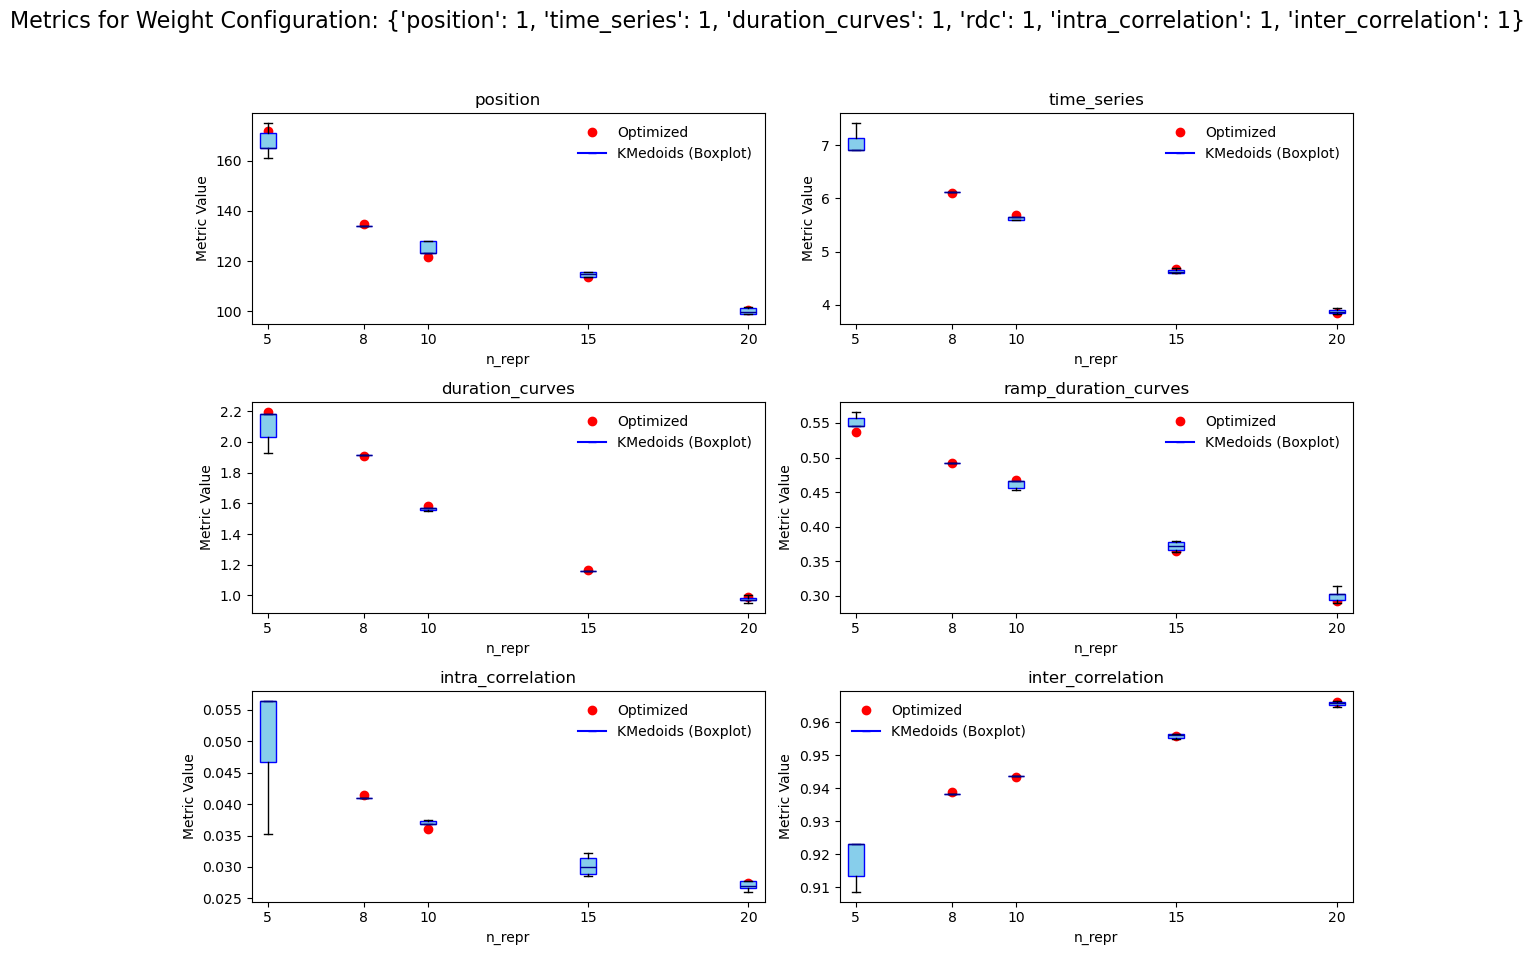

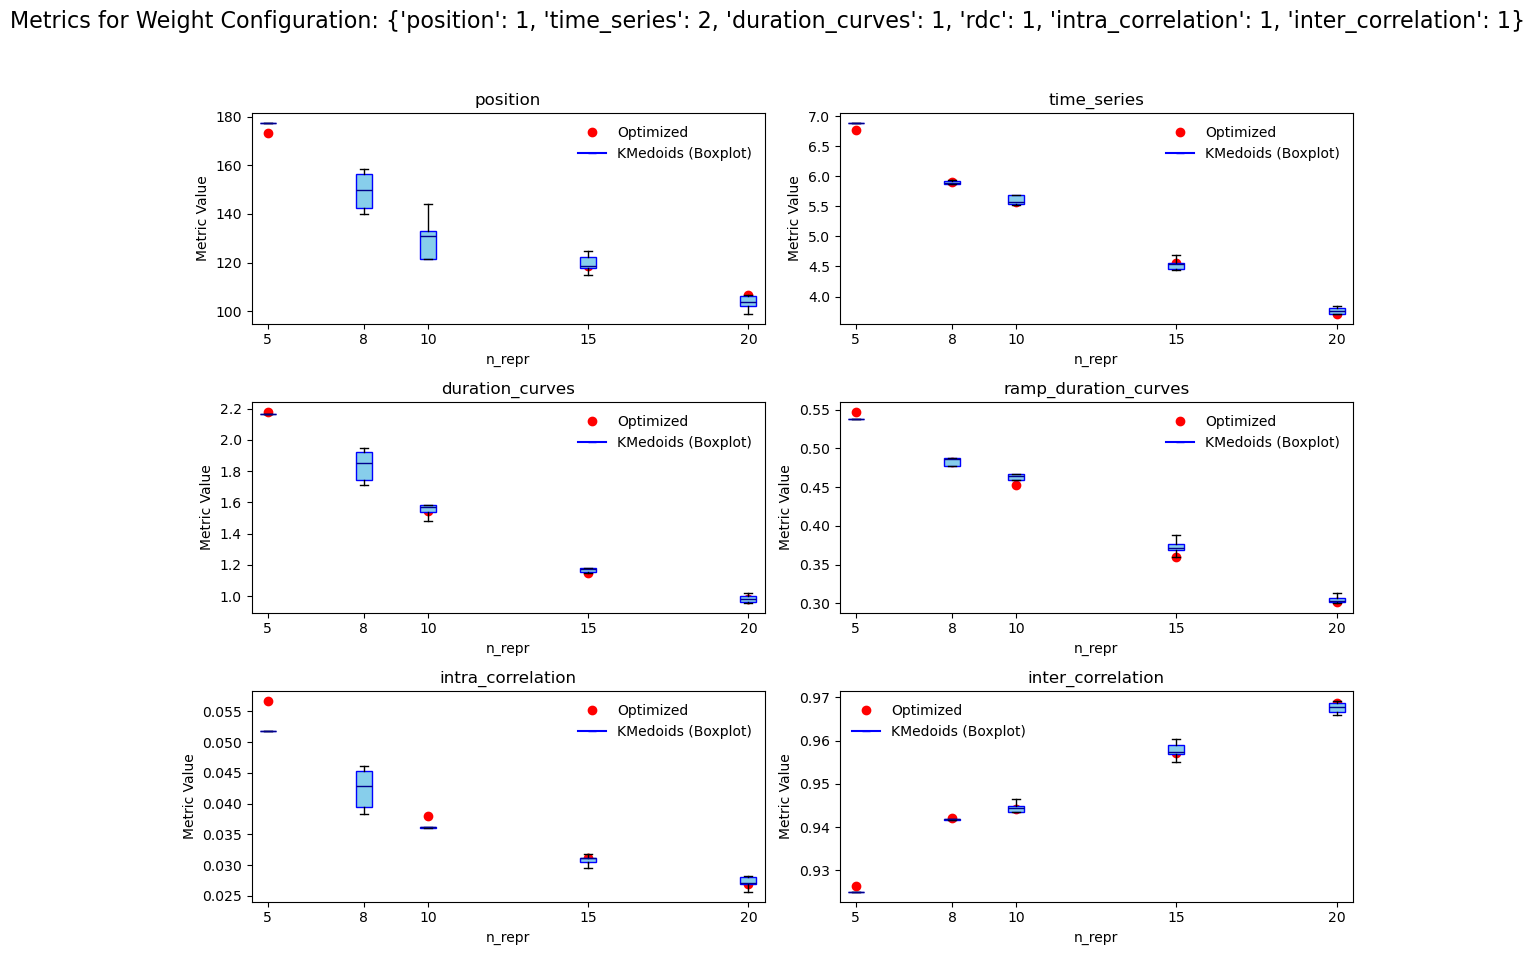

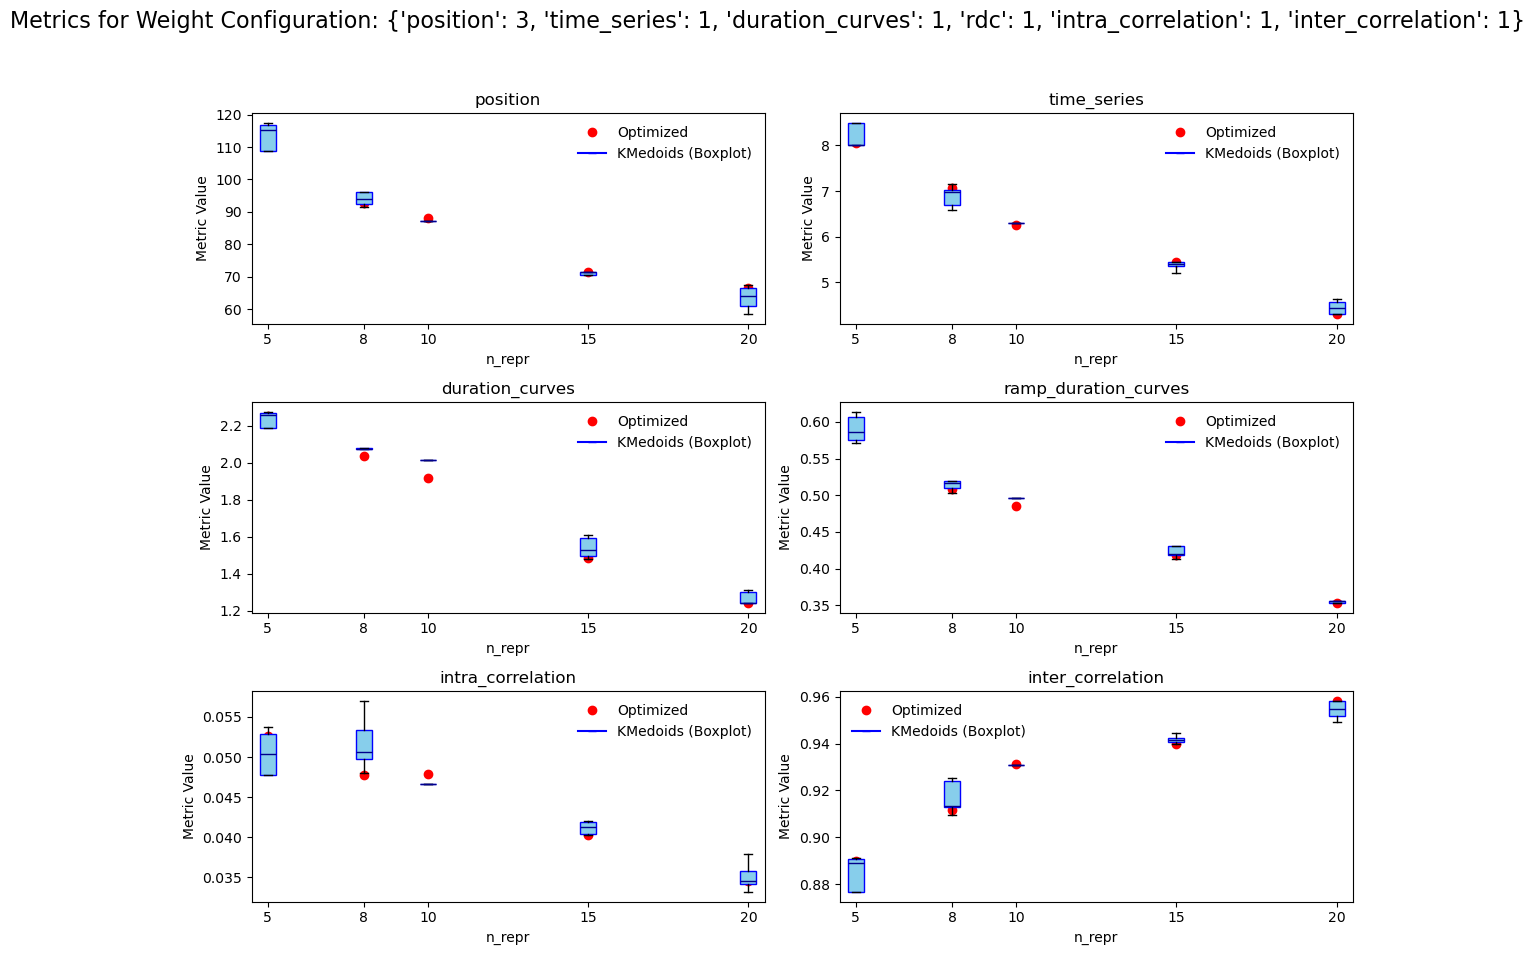

In [8]:
# Metrics to plot
# metrics = ['REEav', 'NRMSEav', 'CEav', 'NRMSERDCav']
metrics = results[0]['optimized_metrics'].keys()
num_metrics = len(metrics)

# Create a DataFrame from results for easier manipulation
data = []
for result in results:
    for metric in metrics:
        data.append({
            'weights': str(result['weights']),
            'n_repr': result['n_repr'],
            'iteration': result['iteration'],
            'metric': metric,
            'optimized_value': result['optimized_metrics'][metric],
            'kmedoids_value': result['kmedoids_metrics'][metric]
        })

df = pd.DataFrame(data)

# Plot for each weight configuration
for weight_config, weight_data in df.groupby('weights'):
    fig, axes = plt.subplots(num_metrics // 2 + num_metrics % 2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Subset data for the current metric
        metric_data = weight_data[weight_data['metric'] == metric]

        # Group by n_repr
        for n_repr, group in metric_data.groupby('n_repr'):
            # Plot candle chart for KMedoids iterations
            kmedoids_iterations = group['kmedoids_value']
            ax.boxplot(
                kmedoids_iterations,
                positions=[n_repr],
                widths=0.5,
                showfliers=False,
                patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='blue'),
                medianprops=dict(color='darkblue')
            )

            # Plot optimized value as a single point
            optimized_value = group['optimized_value'].iloc[0]
            ax.scatter(n_repr, optimized_value, color='red')

        ax.set_title(metric)
        ax.set_xlabel('n_repr')
        ax.set_ylabel('Metric Value')

        # Add legend inside each subplot
        handles = [
            plt.Line2D([0], [0], color='red', marker='o', linestyle='', label='Optimized'),
            plt.Line2D([0], [0], color='blue', marker='_', linestyle='-', label='KMedoids (Boxplot)')
        ]
        ax.legend(handles=handles, loc='best', fontsize=10, frameon=False)

    fig.suptitle(f"Metrics for Weight Configuration: {weight_config}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
